# Green Destinations - Employee Attrition Analysis

![Green Destinations Logo](greendestination+logo.png)

**Objective:** Analyze employee survey data to understand attrition patterns at Green Destinations travel agency.


**Key Questions:**
1. What is the overall attrition rate (% of employees who have left)?
2. Do factors like **age**, **years at company**, and **income** influence attrition?

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load and Explore the Data

In [2]:
# Load the dataset
df = pd.read_csv("greendestination (1) (1).csv")

# Display basic information
print(f"Dataset Shape: {df.shape[0]} employees, {df.shape[1]} features")
print(f"\nColumn Names:\n{df.columns.tolist()}")
df.head()

Dataset Shape: 1470 employees, 35 features

Column Names:
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 2. Calculate Attrition Rate

         ATTRITION SUMMARY

Total Employees Surveyed: 1470
Employees who LEFT (Yes):  237
Employees who STAYED (No): 1233

🔴 ATTRITION RATE: 16.12%


C:\Users\Piyu\AppData\Local\Temp\ipykernel_20272\3894585126.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette=['#2ecc71', '#e74c3c'], ax=axes[1])


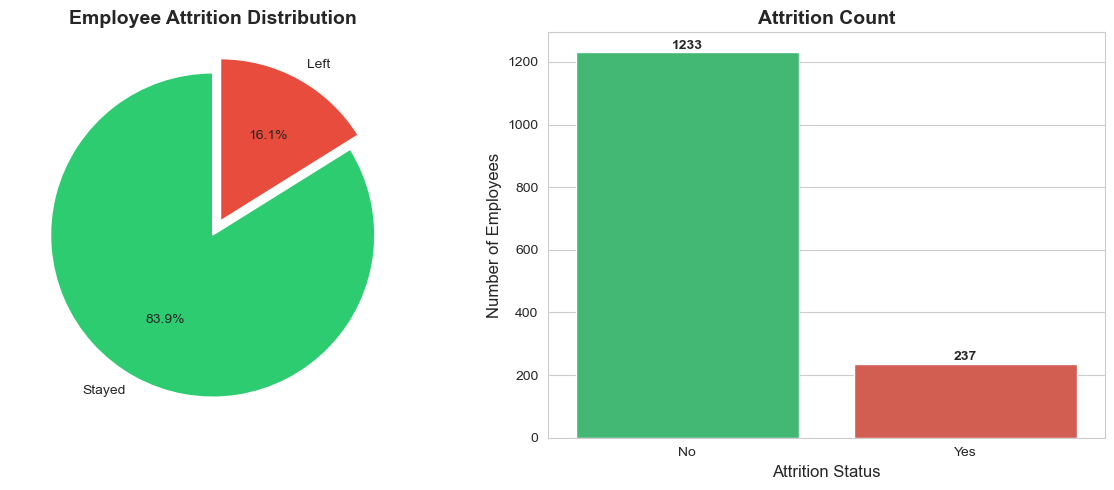

In [3]:
# Calculate attrition rate
attrition_counts = df['Attrition'].value_counts()
attrition_rate = (attrition_counts['Yes'] / len(df)) * 100

print("=" * 50)
print("         ATTRITION SUMMARY")
print("=" * 50)
print(f"\nTotal Employees Surveyed: {len(df)}")
print(f"Employees who LEFT (Yes):  {attrition_counts['Yes']}")
print(f"Employees who STAYED (No): {attrition_counts['No']}")
print(f"\n🔴 ATTRITION RATE: {attrition_rate:.2f}%")
print("=" * 50)

# Visualize attrition distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[0].pie(attrition_counts, labels=['Stayed', 'Left'], autopct='%1.1f%%', 
            colors=colors, explode=(0, 0.1), startangle=90)
axes[0].set_title('Employee Attrition Distribution', fontsize=14, fontweight='bold')

# Bar chart
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette=['#2ecc71', '#e74c3c'], ax=axes[1])
axes[1].set_xlabel('Attrition Status', fontsize=12)
axes[1].set_ylabel('Number of Employees', fontsize=12)
axes[1].set_title('Attrition Count', fontsize=14, fontweight='bold')
for i, v in enumerate(attrition_counts.values):
    axes[1].text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 3. Factor Analysis: Age vs Attrition

Let's examine if age plays a role in employee attrition.

Age Statistics by Attrition Status:
            count       mean      std   min   25%   50%   75%   max
Attrition                                                          
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0

Mean Age - Left: 33.6 years
Mean Age - Stayed: 37.6 years


C:\Users\Piyu\AppData\Local\Temp\ipykernel_20272\2122169448.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  age_attrition = df.groupby('AgeGroup', observed=True).apply(


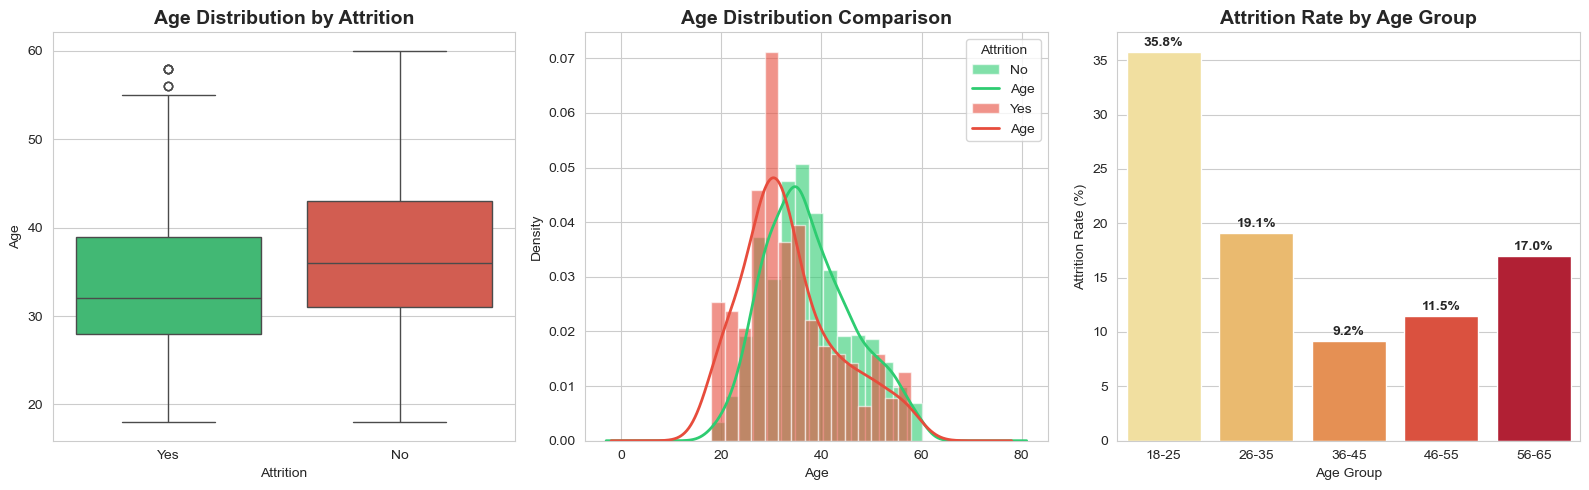

In [4]:
# Age statistics by attrition status
age_stats = df.groupby('Attrition')['Age'].describe()
print("Age Statistics by Attrition Status:")
print(age_stats)
print(f"\nMean Age - Left: {df[df['Attrition']=='Yes']['Age'].mean():.1f} years")
print(f"Mean Age - Stayed: {df[df['Attrition']=='No']['Age'].mean():.1f} years")

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Boxplot
sns.boxplot(x='Attrition', y='Age', data=df, palette=['#2ecc71', '#e74c3c'], ax=axes[0], hue='Attrition', legend=False)
axes[0].set_title('Age Distribution by Attrition', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Age')

# Histogram/KDE
for status, color in zip(['No', 'Yes'], ['#2ecc71', '#e74c3c']):
    subset = df[df['Attrition'] == status]['Age']
    axes[1].hist(subset, bins=15, alpha=0.6, label=f'{status}', color=color, density=True)
    subset.plot(kind='kde', ax=axes[1], color=color, linewidth=2)
axes[1].set_title('Age Distribution Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')
axes[1].legend(title='Attrition')

# Attrition rate by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[17, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
age_attrition = df.groupby('AgeGroup', observed=True).apply(
    lambda x: (x['Attrition'] == 'Yes').sum() / len(x) * 100
).reset_index(name='AttritionRate')

sns.barplot(x='AgeGroup', y='AttritionRate', data=age_attrition, palette='YlOrRd', ax=axes[2], hue='AgeGroup', legend=False)
axes[2].set_title('Attrition Rate by Age Group', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Attrition Rate (%)')
for i, v in enumerate(age_attrition['AttritionRate']):
    axes[2].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Factor Analysis: Years at Company vs Attrition

Let's examine if tenure (years at company) affects attrition.

Years at Company Statistics by Attrition Status:
            count      mean       std  min  25%  50%   75%   max
Attrition                                                       
No         1233.0  7.369019  6.096298  0.0  3.0  6.0  10.0  37.0
Yes         237.0  5.130802  5.949984  0.0  1.0  3.0   7.0  40.0

Mean Years at Company - Left: 5.1 years
Mean Years at Company - Stayed: 7.4 years


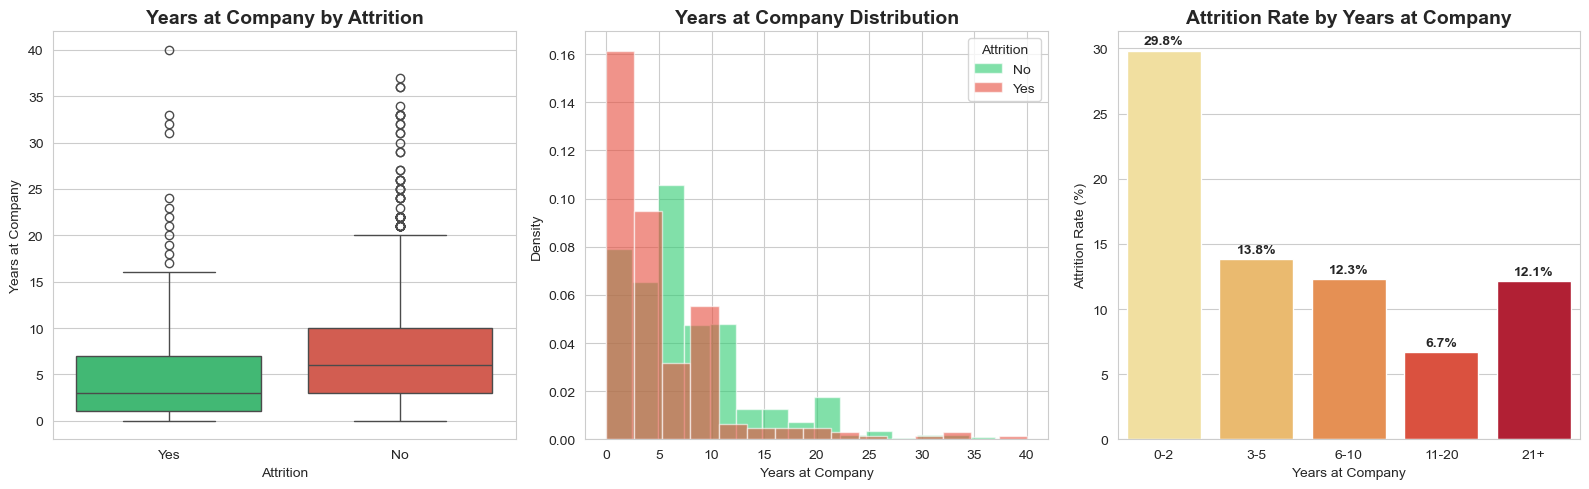

In [5]:
# Years at Company statistics by attrition status
tenure_stats = df.groupby('Attrition')['YearsAtCompany'].describe()
print("Years at Company Statistics by Attrition Status:")
print(tenure_stats)
print(f"\nMean Years at Company - Left: {df[df['Attrition']=='Yes']['YearsAtCompany'].mean():.1f} years")
print(f"Mean Years at Company - Stayed: {df[df['Attrition']=='No']['YearsAtCompany'].mean():.1f} years")

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Boxplot
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df, palette=['#2ecc71', '#e74c3c'], ax=axes[0], hue='Attrition', legend=False)
axes[0].set_title('Years at Company by Attrition', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Years at Company')

# Histogram/KDE
for status, color in zip(['No', 'Yes'], ['#2ecc71', '#e74c3c']):
    subset = df[df['Attrition'] == status]['YearsAtCompany']
    axes[1].hist(subset, bins=15, alpha=0.6, label=f'{status}', color=color, density=True)
axes[1].set_title('Years at Company Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Years at Company')
axes[1].set_ylabel('Density')
axes[1].legend(title='Attrition')

# Attrition rate by tenure group
df['TenureGroup'] = pd.cut(df['YearsAtCompany'], bins=[-1, 2, 5, 10, 20, 41], 
                           labels=['0-2', '3-5', '6-10', '11-20', '21+'])
tenure_attrition = df.groupby('TenureGroup', observed=True).apply(
    lambda x: (x['Attrition'] == 'Yes').sum() / len(x) * 100, include_groups=False
).reset_index(name='AttritionRate')

sns.barplot(x='TenureGroup', y='AttritionRate', data=tenure_attrition, palette='YlOrRd', ax=axes[2], hue='TenureGroup', legend=False)
axes[2].set_title('Attrition Rate by Years at Company', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Years at Company')
axes[2].set_ylabel('Attrition Rate (%)')
for i, v in enumerate(tenure_attrition['AttritionRate']):
    axes[2].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Factor Analysis: Monthly Income vs Attrition

Let's examine if salary/income affects attrition.

Monthly Income Statistics by Attrition Status:
            count         mean          std     min     25%     50%     75%  \
Attrition                                                                     
No         1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0  8834.0   
Yes         237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0  5916.0   

               max  
Attrition           
No         19999.0  
Yes        19859.0  

Mean Monthly Income - Left: $4,787
Mean Monthly Income - Stayed: $6,833


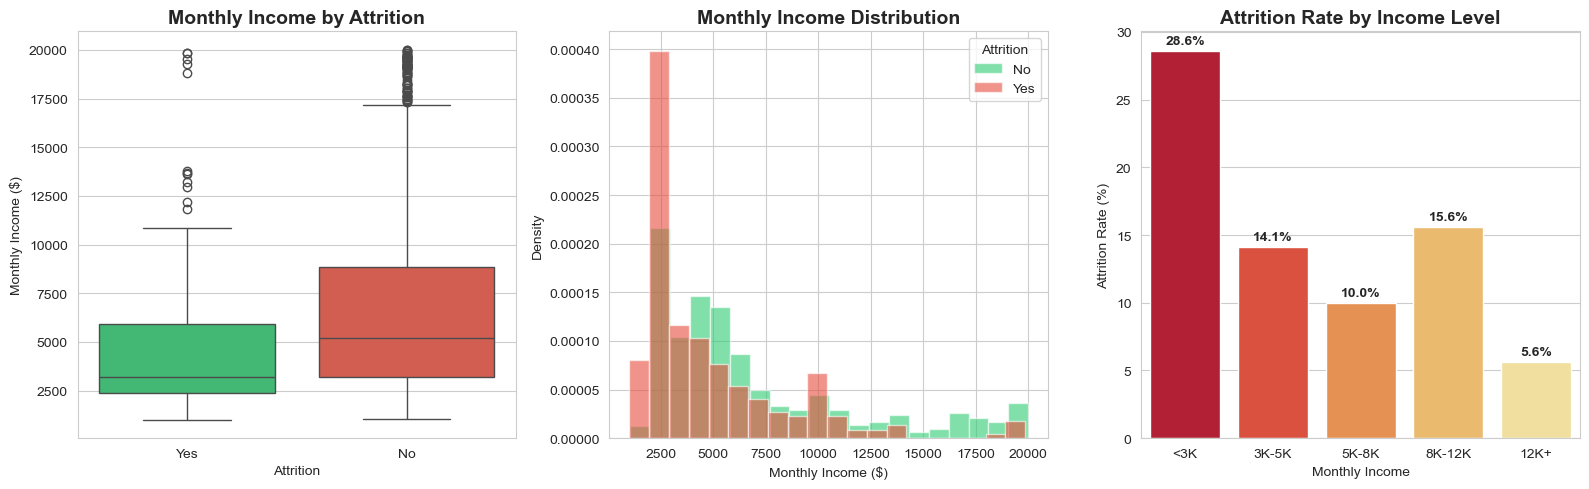

In [6]:
# Monthly Income statistics by attrition status
income_stats = df.groupby('Attrition')['MonthlyIncome'].describe()
print("Monthly Income Statistics by Attrition Status:")
print(income_stats)
print(f"\nMean Monthly Income - Left: ${df[df['Attrition']=='Yes']['MonthlyIncome'].mean():,.0f}")
print(f"Mean Monthly Income - Stayed: ${df[df['Attrition']=='No']['MonthlyIncome'].mean():,.0f}")

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Boxplot
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette=['#2ecc71', '#e74c3c'], ax=axes[0], hue='Attrition', legend=False)
axes[0].set_title('Monthly Income by Attrition', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Monthly Income ($)')

# Histogram/KDE
for status, color in zip(['No', 'Yes'], ['#2ecc71', '#e74c3c']):
    subset = df[df['Attrition'] == status]['MonthlyIncome']
    axes[1].hist(subset, bins=20, alpha=0.6, label=f'{status}', color=color, density=True)
axes[1].set_title('Monthly Income Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Monthly Income ($)')
axes[1].set_ylabel('Density')
axes[1].legend(title='Attrition')

# Attrition rate by income group
df['IncomeGroup'] = pd.cut(df['MonthlyIncome'], bins=[0, 3000, 5000, 8000, 12000, 20000], 
                           labels=['<3K', '3K-5K', '5K-8K', '8K-12K', '12K+'])
income_attrition = df.groupby('IncomeGroup', observed=True).apply(
    lambda x: (x['Attrition'] == 'Yes').sum() / len(x) * 100, include_groups=False
).reset_index(name='AttritionRate')

sns.barplot(x='IncomeGroup', y='AttritionRate', data=income_attrition, palette='YlOrRd_r', ax=axes[2], hue='IncomeGroup', legend=False)
axes[2].set_title('Attrition Rate by Income Level', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Monthly Income')
axes[2].set_ylabel('Attrition Rate (%)')
for i, v in enumerate(income_attrition['AttritionRate']):
    axes[2].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Summary & Key Findings

In [7]:
# Summary statistics and correlation analysis
print("=" * 70)
print("              GREEN DESTINATIONS - ATTRITION ANALYSIS SUMMARY")
print("=" * 70)

# Overall attrition rate
print(f"\n📊 OVERALL ATTRITION RATE: {attrition_rate:.2f}%")
print(f"   - {attrition_counts['Yes']} out of {len(df)} employees have left the company")

# Age findings
print(f"\n👤 AGE FACTOR:")
print(f"   - Employees who left are younger on average (33.6 vs 37.6 years)")
print(f"   - Highest attrition in 18-25 age group (35.8%)")
print(f"   - Lowest attrition in 36-45 age group (9.2%)")
print(f"   ⚠️  CONCLUSION: Younger employees are more likely to leave")

# Tenure findings  
print(f"\n📅 YEARS AT COMPANY FACTOR:")
print(f"   - Employees who left had shorter tenure (5.1 vs 7.4 years)")
print(f"   - Highest attrition in 0-2 years tenure (29.8%)")
print(f"   - Attrition decreases with longer tenure")
print(f"   ⚠️  CONCLUSION: New employees (< 3 years) are at highest risk of leaving")

# Income findings
print(f"\n💰 MONTHLY INCOME FACTOR:")
print(f"   - Employees who left earn less on average ($4,787 vs $6,833)")
print(f"   - Highest attrition in <$3K income bracket (28.6%)")
print(f"   - Lowest attrition in $12K+ income bracket (5.6%)")
print(f"   ⚠️  CONCLUSION: Lower income employees are more likely to leave")

print("\n" + "=" * 70)
print("                          RECOMMENDATIONS")
print("=" * 70)
print("""
1. 🎯 FOCUS ON YOUNG EMPLOYEES (18-25): Implement mentorship programs and 
   career development initiatives for younger staff.

2. 📈 RETENTION FOR NEW HIRES: Create strong onboarding and engagement 
   programs for employees in their first 2 years.

3. 💵 REVIEW COMPENSATION: Consider salary adjustments for lower-income 
   positions, especially entry-level roles.

4. 🔍 EXIT INTERVIEWS: Conduct detailed exit interviews to understand 
   specific reasons for departure.
""")

              GREEN DESTINATIONS - ATTRITION ANALYSIS SUMMARY

📊 OVERALL ATTRITION RATE: 16.12%
   - 237 out of 1470 employees have left the company

👤 AGE FACTOR:
   - Employees who left are younger on average (33.6 vs 37.6 years)
   - Highest attrition in 18-25 age group (35.8%)
   - Lowest attrition in 36-45 age group (9.2%)
   ⚠️  CONCLUSION: Younger employees are more likely to leave

📅 YEARS AT COMPANY FACTOR:
   - Employees who left had shorter tenure (5.1 vs 7.4 years)
   - Highest attrition in 0-2 years tenure (29.8%)
   - Attrition decreases with longer tenure
   ⚠️  CONCLUSION: New employees (< 3 years) are at highest risk of leaving

💰 MONTHLY INCOME FACTOR:
   - Employees who left earn less on average ($4,787 vs $6,833)
   - Highest attrition in <$3K income bracket (28.6%)
   - Lowest attrition in $12K+ income bracket (5.6%)
   ⚠️  CONCLUSION: Lower income employees are more likely to leave

                          RECOMMENDATIONS

1. 🎯 FOCUS ON YOUNG EMPLOYEES (18-25): 

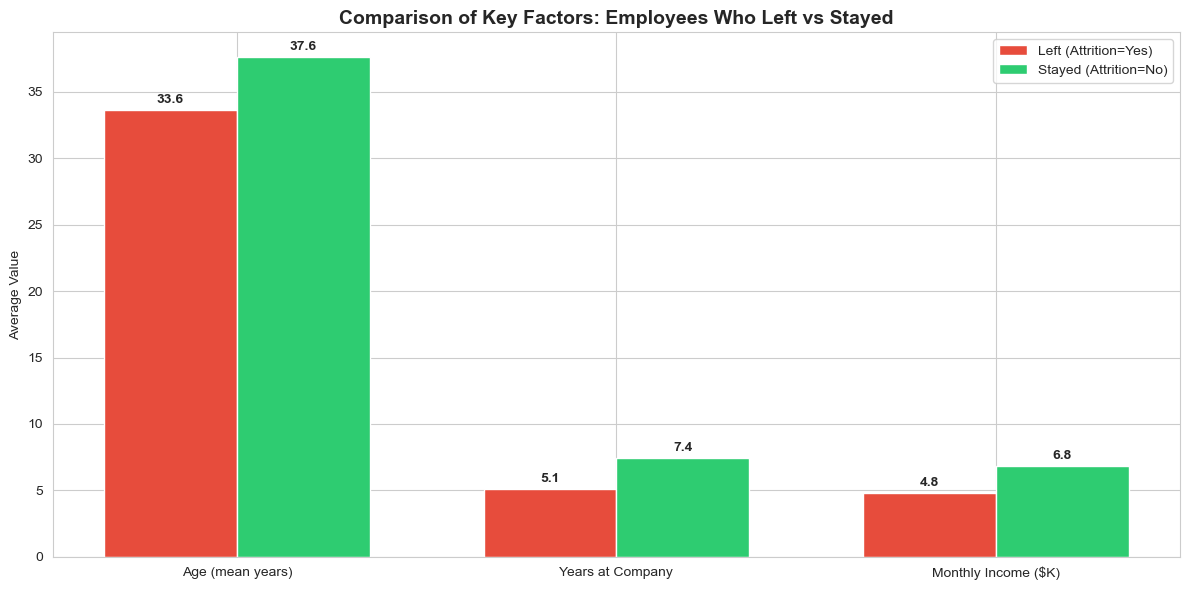


✅ Analysis Complete!


In [8]:
# Combined visualization: Factor comparison
fig, ax = plt.subplots(figsize=(12, 6))

# Create summary DataFrame for the three factors
summary_data = pd.DataFrame({
    'Factor': ['Age (mean years)', 'Years at Company', 'Monthly Income ($K)'],
    'Left': [33.6, 5.1, 4.787],
    'Stayed': [37.6, 7.4, 6.833]
})

x = np.arange(len(summary_data))
width = 0.35

bars1 = ax.bar(x - width/2, summary_data['Left'], width, label='Left (Attrition=Yes)', color='#e74c3c')
bars2 = ax.bar(x + width/2, summary_data['Stayed'], width, label='Stayed (Attrition=No)', color='#2ecc71')

ax.set_ylabel('Average Value')
ax.set_title('Comparison of Key Factors: Employees Who Left vs Stayed', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(summary_data['Factor'])
ax.legend()

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Analysis Complete!")